### 네이버 뉴스 크롤링 (Q6.1)
- 05장_1_nvCrawler.py 프로그램을 수행하여라. 
- 검색어 : 빅데이터
- (X)수행 후 결과 파일을 이용하여 title에 사용된 단어를 wordcloud 프로그램을 이용하여 시각화하여보자 [참고] mywordcloud.py 프로그램 사용

In [3]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json

# 네이버 개발자 센터에서 받은 값
client_id = 'YwMwm1qX948VxA0NB87d'
client_secret = 'UCM0_qCeUi'

# 받아온 url로 데이터 가져오기
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    print("request ok...")
    try: 
        print("trying ok...")
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL... : %s" % (datetime.datetime.now(), url))
        return None

# url 생성하기
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   # url로 요청
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

# 하나의 json 객체 만들기...
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return  

# 크롤링하기
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  # url 생성하고 데이터 받아오기, 1번째 데이터 가져오기
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  # 객체화하기     
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  # 그 다음(start)번째 데이터 가져오기
       
    print('전체 검색 : %d 건' %total)
    
    # 저장하기
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt)) # 1000개씩 가져와지는데, 이는 네이버에서 서비스 신청할 때 정해진 것
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 빅데이터
request ok...
trying ok...
[2023-04-12 15:26:51.662676] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:51.858450] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:52.063856] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:52.284820] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:52.498566] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:52.708529] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:52.919862] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:53.136635] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:53.349617] Url Request Success
request ok...
trying ok...
[2023-04-12 15:26:53.587593] Url Request Success
request ok...
trying ok...
HTTP Error 400: Bad Request
[2023-04-12 15:26:53.699382] Error for URL... : https://openapi.naver.com/v1/search/news.json?query=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0&start=1001&display=100
전체 검색 : 

In [11]:
import json
with open('/Users/min0/Documents/Documents/school/4-1/빅데이터/jupyter/hw/빅데이터_naver_news.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

file = open("textfile.txt", "w", encoding='utf-8');
for i in range(len(json_data)):
    file.write(json_data[i]['title'])
    
    
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
# 한글 폰트 패스로 지정
import re
import nltk
from konlpy.tag import Okt;

JVM_PATH = '/Library/Java/JavaVirtualMachines/jdk1.8.0_361.jdk/Contents/Home/jre/lib/jli/libjli.dylib'
t = Okt(jvmpath=JVM_PATH)

# 문장에서 필요 없는 데이터
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','했습니다',
              '이다','대해','에게','입니다','있다','사람','대한','3','합니다','및','장','에서','하고','검','한다','만',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분',
             '영화', '감독', '다큐멘터리', '다큐','것', '그', '이', '수', '사람', '인간', '최고', '우리', '생각', '자신', '이야기', '점', '현실', '더', '보고', '존재', '모습', 
                       '속', '말', '장면', '일', '대한', '뿐',  '가장', '때', '정말', '지금', '나', '상황', '정도' '면', '습', '게', '자', '끝', '볼', '건', '못', 
                       '마치', '과로', '기도', '보', '곳', '그', '이상', '원래', '일이', '전', '사람', '도', '막', '를', '다른', '부터', '자기', '시대','평',
                       '소리', '뭐', '더', '막상', '전혀', '내', '살', '현재', '지금', '이제',  '사', '인', '법', '노인', '꼭', '간','향후', '사회', '당신', '손', 
                       '저', '경우', '전', '얼마', '일단', '걸', '안', '바로', '그냥', '위해', '때문', '은', '앞',  '볼', '자기', '처럼', '순간', '앞', '감정', 
                       '관련', '일', '가야', '살', '보','요', '보고', '수', '제', '두', '몇', '제', '죽', '때', '해', '이', '중', '내내', '후', '정도', '변화', '감',
                       '여러','대한', '것', '시작', '래야', '진짜','또', '수도', '오히려', '니', '여기', '꼭', '과연', '나라', '자', '과거', '최후', '무엇',
                       '누가', '뒤', '얘기', '방식', '알', '그것', '탓', '계속', '방법', '대해', '마지막', '악', '처음', '기분', '의미', '놈', '승리',
                       '역사'
             ]

spwords = set(STOPWORDS) 

content_text = open("textfile.txt", 'r', encoding='utf-8').read()

def strip_e(st):
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return RE_EMOJI.sub(r'', st)


8327
2261


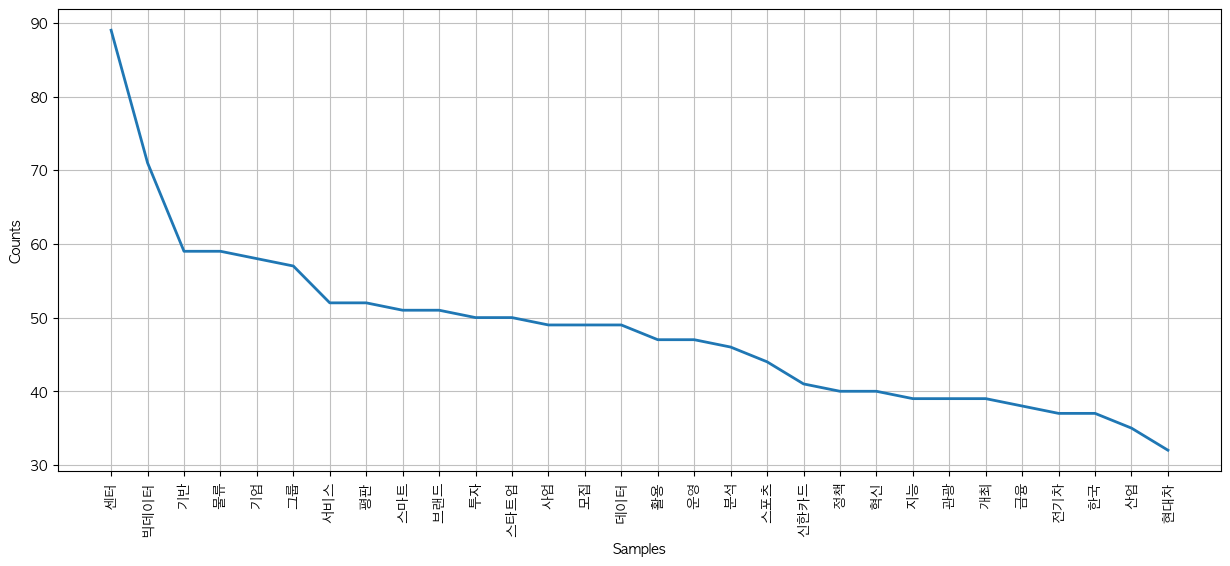

In [12]:
content_text=strip_e(content_text)
tokens_ko = t.morphs(content_text)
tokens_ko = t.nouns(content_text) # 명사만 빼내기
tokens_ko

ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100) 

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(15,6))
ko.plot(30) 
plt.show()

In [13]:
data = ko.vocab().most_common(300)
print(len(data))
data

300


[('센터', 89),
 ('빅데이터', 71),
 ('기반', 59),
 ('물류', 59),
 ('기업', 58),
 ('그룹', 57),
 ('서비스', 52),
 ('평판', 52),
 ('스마트', 51),
 ('브랜드', 51),
 ('투자', 50),
 ('스타트업', 50),
 ('사업', 49),
 ('모집', 49),
 ('데이터', 49),
 ('활용', 47),
 ('운영', 47),
 ('분석', 46),
 ('스포츠', 44),
 ('신한카드', 41),
 ('정책', 40),
 ('혁신', 40),
 ('지능', 39),
 ('관광', 39),
 ('개최', 39),
 ('금융', 38),
 ('전기차', 37),
 ('한국', 37),
 ('산업', 35),
 ('현대차', 32),
 ('미래', 32),
 ('기술', 31),
 ('국내', 31),
 ('선정', 31),
 ('참가', 31),
 ('협력', 30),
 ('인증', 30),
 ('챗', 29),
 ('롯데', 29),
 ('도시', 28),
 ('지원', 28),
 ('학원', 28),
 ('프로그램', 28),
 ('글로벌', 27),
 ('솔루션', 27),
 ('개발', 26),
 ('제공', 26),
 ('정부', 26),
 ('공모전', 26),
 ('티맥스', 25),
 ('협업', 25),
 ('공모', 24),
 ('첫', 24),
 ('디지털', 23),
 ('업무', 23),
 ('협약', 23),
 ('추진', 23),
 ('광주', 23),
 ('에이버리', 23),
 ('데니', 23),
 ('슨', 23),
 ('첨단', 23),
 ('터미널', 23),
 ('부동산', 23),
 ('위성', 23),
 ('시', 22),
 ('구축', 22),
 ('규제', 22),
 ('자동차', 22),
 ('메', 21),
 ('허브', 21),
 ('거래', 21),
 ('량', 21),
 ('아임벤처스', 21),
 ('과학', 20),
 ('

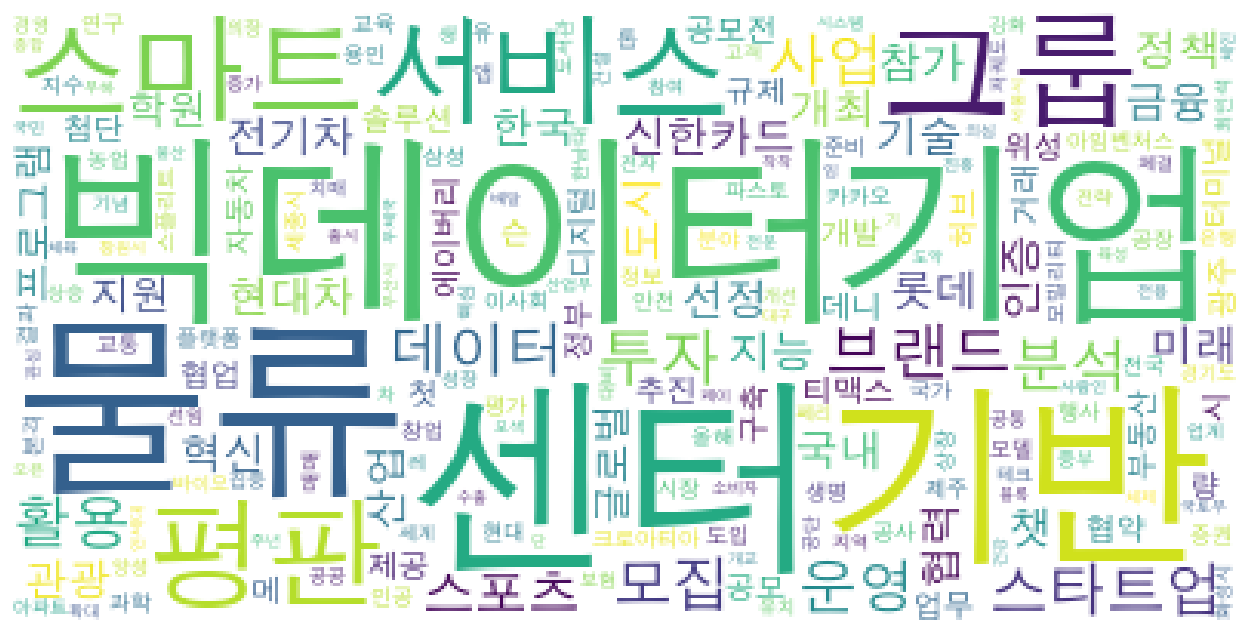

In [14]:
# list tuple을 딕셔너리로 만들어주는 함수 - Uchang
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict


# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='/System/Library/Fonts/Supplemental/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()